In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv
/kaggle/input/edudata/EduData.csv


In [2]:
# import pandas as pd

# # Set display options to show all columns and rows
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [3]:
df1 = pd.read_csv("/kaggle/input/edudata/EduData.csv", na_values='?')
df1

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,T,Father,5.0,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17,14,57,No,Bad,Above-7,L


In [4]:
df1.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   478 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     478 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  472 non-null    object 
 9   raisedhands               478 non-null    float64
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

Before we make any changes, we are going to duplicate the dataset so that original dataset is not affected.

In [6]:
df = df1.copy()

## Deal with missing values

a) Topic- replace with most common

b) Relation- remove the rows

c) GradeID- remove the rows

d) Raisedhands- replace with average

In [7]:
# checking for the count of null values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     2
SectionID                   0
Topic                       2
Semester                    0
Relation                    8
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [8]:
df[df['Topic'].isnull()]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
118,F,KW,KuwaIT,lowerlevel,G-02,C,NaN,F,Mum,24.0,35,23,22,Yes,Good,Above-7,M
363,M,Palestine,Jordan,lowerlevel,G-02,A,NaN,S,Father,80.0,88,51,39,Yes,Good,Under-7,H


In [9]:
# finding the most common value
df['Topic'].value_counts()

Topic
IT           94
French       65
Arabic       58
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: count, dtype: int64

In [10]:
# replace the missing data with most common value
df['Topic'].replace(np.NaN, "IT", inplace =True)

/tmp/ipykernel_18/2736566529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Topic'].replace(np.NaN, "IT", inplace =True)


In [11]:
# rechecking for the missing values
df['Topic'].isnull().sum()

0

In [12]:
# dropping rows which have null values
df.dropna(subset=['Relation', 'GradeID'], inplace = True)

In [13]:
# rechecking for the missing values
df['Relation'].isnull().sum()

0

In [14]:
# rechecking for the missing values
df['GradeID'].isnull().sum()

0

In [15]:
# finding the mean (avg)
df['raisedhands'].mean()

46.83119658119658

In [16]:
# replacing the missing data with avg
df['raisedhands'].replace(np.NaN, 47.0, inplace = True)

/tmp/ipykernel_18/1729502920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['raisedhands'].replace(np.NaN, 47.0, inplace = True)


In [17]:
# rechecking for the missing values
df.raisedhands.isnull().sum()

0

## Scan all variables for outliers

Semester- remove outliers

ParentansweringSurvey- mismatched-remove the column

Frequency Counts:

For categorical variables, you can check the frequency counts of each category. If a particular category has an unexpectedly low or high frequency, it might indicate an issue.

In [18]:
df['Semester'].value_counts()

Semester
F    240
S    228
T      2
Name: count, dtype: int64

Unusual Categories:

Examine the unique values in the object-type columns. If you observe unexpected or unusual categories, it might be worth investigating.



In [19]:
# Checking unique values for 'Semester' in DataFrame df
df['Semester'].unique()


array(['F', 'S', 'T'], dtype=object)

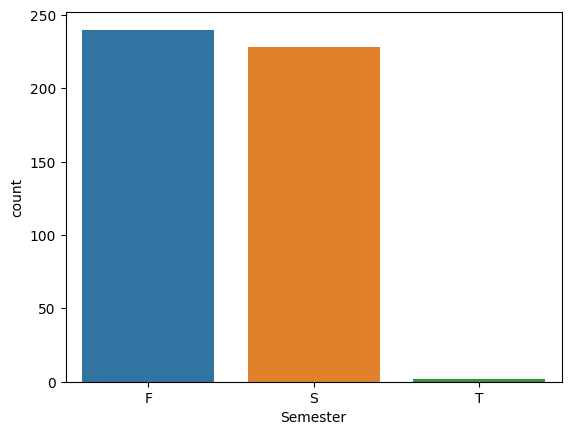

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Semester', data=df)
plt.show()


In [21]:
df['Semester'] = df['Semester'].drop(df[df['Semester']=="T"].index)

In [22]:
df.dropna(subset=['Semester'], inplace = True)
df['Semester'].value_counts()

Semester
F    240
S    228
Name: count, dtype: int64

In [23]:
df['ParentAnsweringSurvey'].value_counts()

ParentAnsweringSurvey
Yes    261
No     207
Name: count, dtype: int64

In [24]:
df.drop(columns=['ParentAnsweringSurvey'], inplace = True)
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,2.0,7,4,8,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77,14,28,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74,25,29,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17,14,57,Bad,Above-7,L


## Normalization-
a) Raisedhands

b) VisitedResources

In [25]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [26]:

# Function to normalize a column
def normalize_column(column):
    return column / column.max()

# List of columns to normalize
columns_to_normalize = ['raisedhands', 'VisITedResources']

# Normalize the specified columns
df[columns_to_normalize] = df[columns_to_normalize].apply(normalize_column)


In [27]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.161616,2,20,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.202020,3,25,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,0.070707,0,30,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.30,0.252525,5,35,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,0.505051,12,50,Bad,Above-7,M


## Transformation

a) GradeID- Convert grades to 1-10

b) StudentAbsentDays

In [28]:
df['GradeID'].value_counts()

GradeID
G-02    142
G-08    115
G-07     98
G-04     48
G-06     31
G-11     13
G-12      9
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64

In [29]:
# Dictionary for grades conversion
grade_conversion = {'G-02': 1, 'G-04': 2, 'G-05': 3, 'G-06': 4, 'G-07': 5,
                    'G-08': 6, 'G-09': 7, 'G-10': 8, 'G-11': 9, 'G-12': 10}

# Replace values in 'GradeID' column with their numerical equivalents
df['GradeID'] = df['GradeID'].replace(grade_conversion)

/tmp/ipykernel_18/944614738.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GradeID'] = df['GradeID'].replace(grade_conversion)


In [30]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.15,0.161616,2,20,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.20,0.202020,3,25,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.10,0.070707,0,30,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.30,0.252525,5,35,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.40,0.505051,12,50,Bad,Above-7,M


In [31]:
df['StudentAbsenceDays'].value_counts()

StudentAbsenceDays
Under-7    282
Above-7    186
Name: count, dtype: int64

We will be using Binary encoding for this. 

Binary Encoding:

We can convert the column into a binary format where "under-7" is represented as 0 and "above-7" is represented as 1. This binary encoding is often useful when dealing with binary classification problems.

In [32]:
# Binary encoding
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].apply(lambda x: 0 if x == 'under-7' else 1)

In [33]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.15,0.161616,2,20,Good,1,M
1,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.20,0.202020,3,25,Good,1,M
2,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.10,0.070707,0,30,Bad,1,L
3,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.30,0.252525,5,35,Bad,1,L
4,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.40,0.505051,12,50,Bad,1,M


## Binning to add new column

"Binning to add a new column" typically refers to the process of grouping or categorizing numerical data into discrete intervals or bins and then creating a new column to represent these bins. This is often done to simplify the analysis, handle outliers, or convert numerical data into a categorical form.

I am choosing "AnnouncementsView" to be converted into bins.

In [34]:
# Define bins
bins = [0, 30, 60, 100]

# Define labels for the bins
labels = ['Low', 'Medium', 'High']

# Perform binning and add a new column 'AnnouncementBinned'
df['AnnouncementBinned'] = pd.cut(df['AnnouncementsView'], bins=bins, labels=labels, include_lowest=True)


In [35]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,AnnouncementBinned
0,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.15,0.161616,2,20,Good,1,M,Low
1,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.20,0.202020,3,25,Good,1,M,Low
2,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.10,0.070707,0,30,Bad,1,L,Low
3,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.30,0.252525,5,35,Bad,1,L,Low
4,M,KW,KuwaIT,lowerlevel,2,A,IT,F,Father,0.40,0.505051,12,50,Bad,1,M,Low


## Saving the DataFrame as csv file

In [36]:
df.to_csv("2039-Assignment2.csv")